### Analysis of Students' Study Time Distribution: Bell Curve and Quartiles

C:\Users\SON\AppData\Local\Temp\ipykernel_23348\3519539028.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total_time_spent, shade=True, color="skyblue", alpha=0.7, linewidth=2)


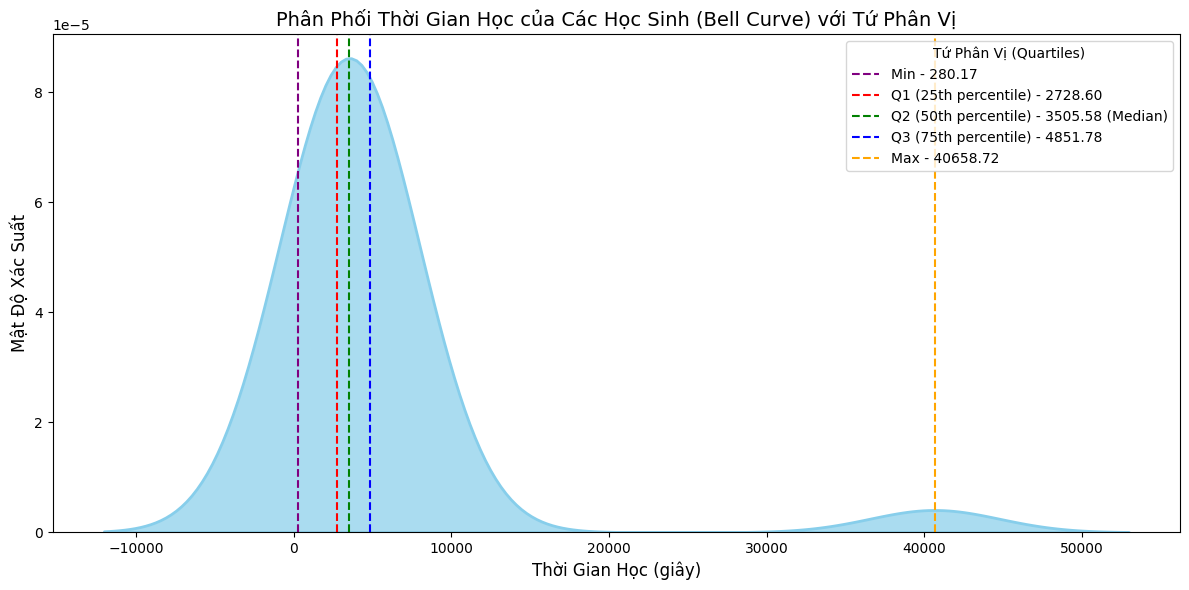

Min, Q1, Q2, Q3, and Max:
Min: 280.17
Q1 (25th percentile): 2728.60
Q2 (50th percentile): 3505.58
Q3 (75th percentile): 4851.78
Max: 40658.72


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'other_logs.xlsx' 
df_logs = pd.read_excel(file_path, engine='openpyxl')

df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

df_logs['time_diff'] = df_logs.groupby('userName')['timestamp'].diff()

step_logs = df_logs[df_logs['logType'] == 'step']

total_time_spent = step_logs.groupby('userName')['time_diff'].sum().dt.total_seconds()

Q1 = total_time_spent.quantile(0.25)
Q2 = total_time_spent.quantile(0.50)  
Q3 = total_time_spent.quantile(0.75)

min_value = total_time_spent.min()
max_value = total_time_spent.max()

plt.figure(figsize=(12, 6))

sns.kdeplot(total_time_spent, shade=True, color="skyblue", alpha=0.7, linewidth=2)

plt.axvline(min_value, color='purple', linestyle='--', label=f'Min - {min_value:.2f}')
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 (25th percentile) - {Q1:.2f}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Q2 (50th percentile) - {Q2:.2f} (Median)')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3 (75th percentile) - {Q3:.2f}')
plt.axvline(max_value, color='orange', linestyle='--', label=f'Max - {max_value:.2f}')

plt.title('Phân Phối Thời Gian Học của Các Học Sinh (Bell Curve) với Tứ Phân Vị', fontsize=14)
plt.xlabel('Thời Gian Học (giây)', fontsize=12)
plt.ylabel('Mật Độ Xác Suất', fontsize=12)
plt.legend(title="Tứ Phân Vị (Quartiles)", loc='upper right')

plt.tight_layout()
plt.show()

print("Min, Q1, Q2, Q3, and Max:")
print(f"Min: {min_value:.2f}")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (50th percentile): {Q2:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"Max: {max_value:.2f}")


### Analysis of Student Diligence Based on Time Spent Learning

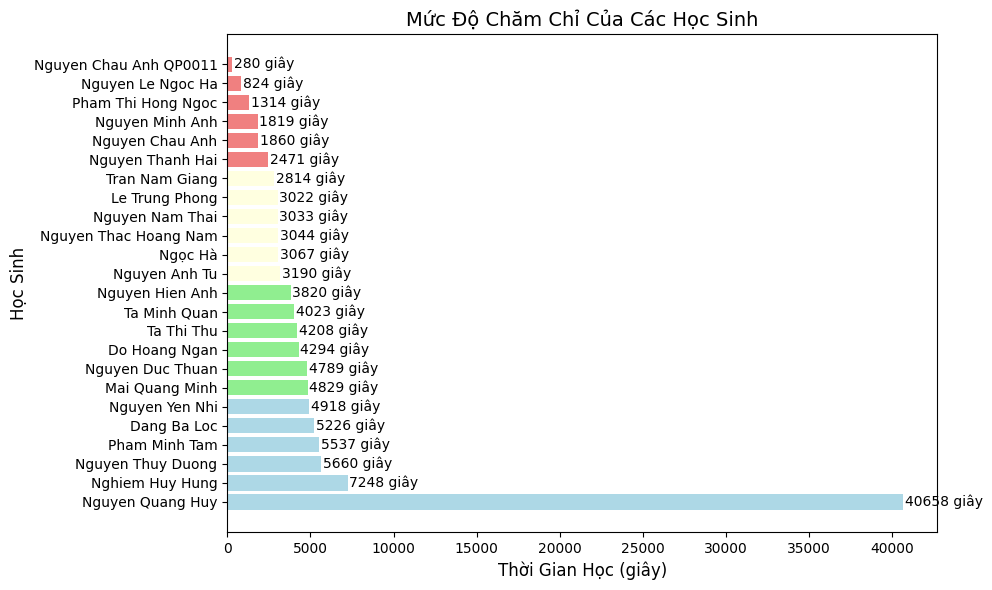

                        Tổng Thời Gian Học (giây) Mức Độ Chăm Chỉ
userName                                                         
Nguyen Quang Huy                        40658.718            High
Nghiem Huy Hung                          7248.137            High
Nguyen Thuy Duong                        5660.417            High
Pham Minh Tam                            5537.607            High
Dang Ba Loc                              5226.008            High
Nguyen Yen Nhi                           4918.387            High
Mai Quang Minh                           4829.577     Medium-High
Nguyen Duc Thuan                         4789.079     Medium-High
Do Hoang Ngan                            4294.525     Medium-High
Ta Thi Thu                               4208.279     Medium-High
Ta Minh Quan                             4023.706     Medium-High
Nguyen Hien Anh                          3820.755     Medium-High
Nguyen Anh Tu                            3190.400      Medium-Low
Ngọc Hà   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'other_logs.xlsx'  
df_logs = pd.read_excel(file_path, engine='openpyxl')

df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

df_logs['time_diff'] = df_logs.groupby('userName')['timestamp'].diff()

step_logs = df_logs[df_logs['logType'] == 'step']

total_time_spent = step_logs.groupby('userName')['time_diff'].sum().dt.total_seconds()

total_time_spent_cleaned = pd.to_numeric(total_time_spent, errors='coerce')

total_time_spent_cleaned = total_time_spent_cleaned.dropna()

Q1_cleaned = total_time_spent_cleaned.quantile(0.25)
Q2_cleaned = total_time_spent_cleaned.quantile(0.50)
Q3_cleaned = total_time_spent_cleaned.quantile(0.75)

min_value_cleaned = total_time_spent_cleaned.min()
max_value_cleaned = total_time_spent_cleaned.max()

def categorize_time_spent(time_spent):
    if time_spent <= Q1_cleaned:
        return 'Low'
    elif time_spent <= Q2_cleaned:
        return 'Medium-Low'
    elif time_spent <= Q3_cleaned:
        return 'Medium-High'
    else:
        return 'High'

categories_cleaned = total_time_spent_cleaned.apply(categorize_time_spent)

result_df_sorted_cleaned = pd.DataFrame({'Tổng Thời Gian Học (giây)': total_time_spent_cleaned, 'Mức Độ Chăm Chỉ': categories_cleaned})

result_df_sorted_cleaned = result_df_sorted_cleaned.loc[total_time_spent_cleaned.sort_values(ascending=False).index]

category_colors = {'Low': 'lightcoral', 'Medium-Low': 'lightyellow', 'Medium-High': 'lightgreen', 'High': 'lightblue'}

plt.figure(figsize=(10, 6))

bars = plt.barh(result_df_sorted_cleaned.index, total_time_spent_cleaned[result_df_sorted_cleaned.index],
                color=[category_colors[cat] for cat in result_df_sorted_cleaned['Mức Độ Chăm Chỉ']])

plt.title('Mức Độ Chăm Chỉ Của Các Học Sinh', fontsize=14)
plt.xlabel('Thời Gian Học (giây)', fontsize=12)
plt.ylabel('Học Sinh', fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)} giây', va='center')

plt.tight_layout()
plt.show()

print(result_df_sorted_cleaned)

result_df_sorted_cleaned.to_csv('sorted_student_time_spent.csv', index=False)


C:\Users\SON\AppData\Local\Temp\ipykernel_15424\3757300754.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_filtered['time_diff'] = df_logs_filtered.groupby('userName')['timestamp'].diff()


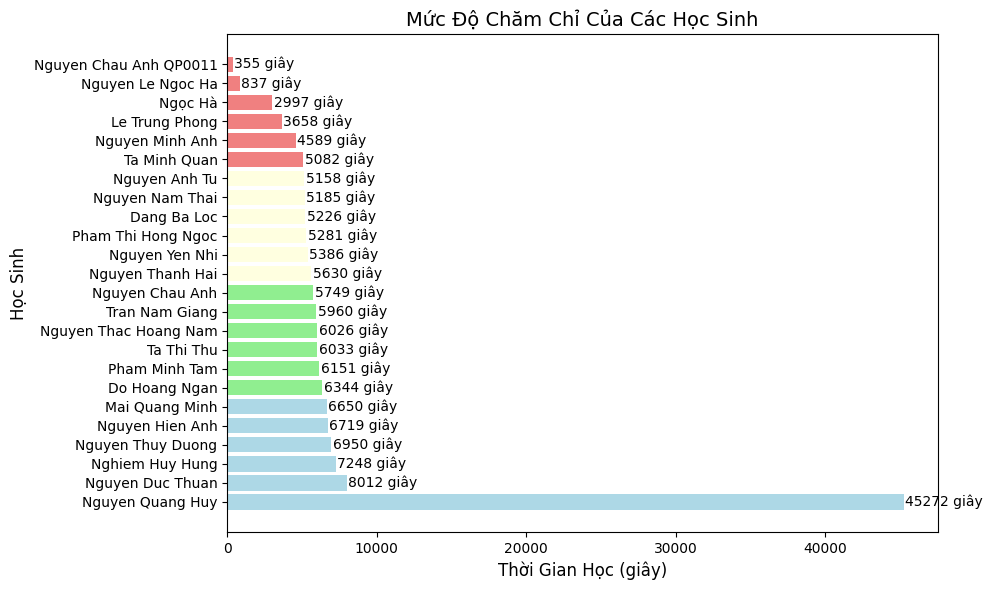

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'other_logs.xlsx'  
df_logs = pd.read_excel(file_path, engine='openpyxl')

# Chuyển đổi cột timestamp thành kiểu datetime
df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

# Lọc ra các bản ghi không phải là 'leaveRoom' và 'scrollPosition'
df_logs_filtered = df_logs[~df_logs['logType'].isin(['leaveRoom', 'scrollPosition'])]

# Tính toán thời gian chênh lệch giữa các bản ghi cho các log còn lại
df_logs_filtered['time_diff'] = df_logs_filtered.groupby('userName')['timestamp'].diff()

# Tổng hợp tổng thời gian dành cho mỗi người dùng từ tất cả các loại log còn lại
total_time_spent = df_logs_filtered.groupby('userName')['time_diff'].sum().dt.total_seconds()

# Chuyển đổi thành kiểu số thực và loại bỏ giá trị NaN
total_time_spent_cleaned = pd.to_numeric(total_time_spent, errors='coerce')
total_time_spent_cleaned = total_time_spent_cleaned.dropna()

# Tính các phân vị (Q1, Q2, Q3) và tính các mức độ thời gian
Q1_cleaned = total_time_spent_cleaned.quantile(0.25)
Q2_cleaned = total_time_spent_cleaned.quantile(0.50)
Q3_cleaned = total_time_spent_cleaned.quantile(0.75)

def categorize_time_spent(time_spent):
    if time_spent <= Q1_cleaned:
        return 'Low'
    elif time_spent <= Q2_cleaned:
        return 'Medium-Low'
    elif time_spent <= Q3_cleaned:
        return 'Medium-High'
    else:
        return 'High'

categories_cleaned = total_time_spent_cleaned.apply(categorize_time_spent)

# Kết quả với thời gian học và phân loại mức độ chăm chỉ
result_df_sorted_cleaned = pd.DataFrame({'Tổng Thời Gian Học (giây)': total_time_spent_cleaned, 'Mức Độ Chăm Chỉ': categories_cleaned})

# Sắp xếp theo thời gian học từ cao đến thấp
result_df_sorted_cleaned = result_df_sorted_cleaned.loc[total_time_spent_cleaned.sort_values(ascending=False).index]

# Visualize the results
category_colors = {'Low': 'lightcoral', 'Medium-Low': 'lightyellow', 'Medium-High': 'lightgreen', 'High': 'lightblue'}

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ thanh ngang
bars = plt.barh(result_df_sorted_cleaned.index, total_time_spent_cleaned[result_df_sorted_cleaned.index],
                color=[category_colors[cat] for cat in result_df_sorted_cleaned['Mức Độ Chăm Chỉ']])

# Thêm tiêu đề và nhãn
plt.title('Mức Độ Chăm Chỉ Của Các Học Sinh', fontsize=14)
plt.xlabel('Thời Gian Học (giây)', fontsize=12)
plt.ylabel('Học Sinh', fontsize=12)

# Thêm giá trị thời gian vào các thanh trong biểu đồ
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)} giây', va='center')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Lưu kết quả vào CSV
result_df_sorted_cleaned.to_csv('sorted_student_total_time_spent_1.csv', index=False)



### Phân Tích Tuần 1 ###


C:\Users\SON\AppData\Local\Temp\ipykernel_13684\4252701080.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_filtered['time_diff'] = df_logs_filtered.groupby('userName')['timestamp'].diff()


                        Tổng Thời Gian Học (giây)      Mức Độ Chăm Chỉ
userName                                                              
Nguyen Quang Huy                        45272.997  Very High (Outlier)
Nguyen Duc Thuan                         8012.059                 High
Nghiem Huy Hung                          7248.137                 High
Nguyen Thuy Duong                        6950.705                 High
Nguyen Hien Anh                          6719.286                 High
Mai Quang Minh                           6650.945                 High
Do Hoang Ngan                            6344.520          Medium-High
Pham Minh Tam                            6151.995          Medium-High
Ta Thi Thu                               6033.794          Medium-High
Nguyen Thac Hoang Nam                    6026.283          Medium-High
Tran Nam Giang                           5960.603          Medium-High
Nguyen Chau Anh                          5749.548          Medium-High
Nguyen

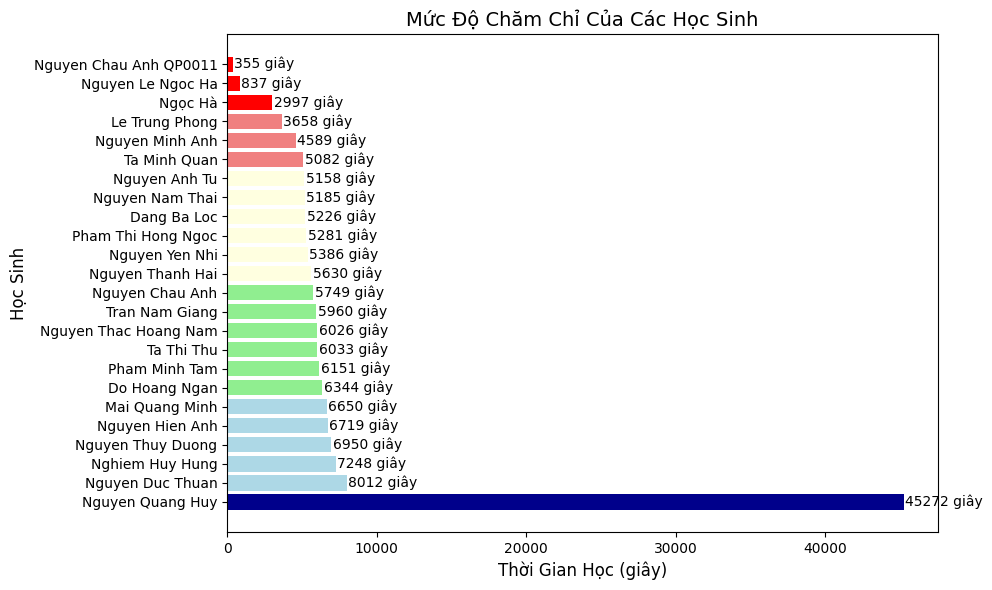

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def process_log_data(file_path):
    df_logs = pd.read_excel(file_path, engine='openpyxl') if file_path.endswith('.xlsx') else pd.read_csv(file_path)
    
    df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')
    
    df_logs_filtered = df_logs[~df_logs['logType'].isin(['leaveRoom','scrollPosition'])]
    
    df_logs_filtered['time_diff'] = df_logs_filtered.groupby('userName')['timestamp'].diff()
    
    total_time_spent = df_logs_filtered.groupby('userName')['time_diff'].sum().dt.total_seconds()
    
    total_time_spent_cleaned = pd.to_numeric(total_time_spent, errors='coerce').dropna()
    
    Q1_cleaned = total_time_spent_cleaned.quantile(0.25)
    Q2_cleaned = total_time_spent_cleaned.quantile(0.50)
    Q3_cleaned = total_time_spent_cleaned.quantile(0.75)
    IQR = Q3_cleaned - Q1_cleaned
    upper_limit = Q3_cleaned + 1.5 * IQR
    lower_limit = Q1_cleaned - 1.5 * IQR
    
    def categorize_time_spent(time_spent):
        if time_spent < lower_limit:
            return 'Very Low (Outlier)'
        elif time_spent <= Q1_cleaned:
            return 'Low'
        elif time_spent <= Q2_cleaned:
            return 'Medium-Low'
        elif time_spent <= Q3_cleaned:
            return 'Medium-High'
        elif time_spent <= upper_limit:
            return 'High'
        else:
            return 'Very High (Outlier)'
    
    categories_cleaned = total_time_spent_cleaned.apply(categorize_time_spent)
    
    result_df_sorted_cleaned = pd.DataFrame({
        'Tổng Thời Gian Học (giây)': total_time_spent_cleaned, 
        'Mức Độ Chăm Chỉ': categories_cleaned
    }).sort_values(by='Tổng Thời Gian Học (giây)', ascending=False)
    
    return result_df_sorted_cleaned, lower_limit, upper_limit

def plot_student_time(result_df_sorted_cleaned):
    category_colors = {
        'Very Low (Outlier)': 'red',
        'Low': 'lightcoral',
        'Medium-Low': 'lightyellow',
        'Medium-High': 'lightgreen',
        'High': 'lightblue',
        'Very High (Outlier)': 'darkblue'
    }
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(result_df_sorted_cleaned.index, 
                     result_df_sorted_cleaned['Tổng Thời Gian Học (giây)'],
                     color=[category_colors[cat] for cat in result_df_sorted_cleaned['Mức Độ Chăm Chỉ']])
    
    plt.title('Mức Độ Chăm Chỉ Của Các Học Sinh', fontsize=14)
    plt.xlabel('Thời Gian Học (giây)', fontsize=12)
    plt.ylabel('Học Sinh', fontsize=12)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)} giây', va='center')
    
    plt.tight_layout()
    plt.show()

def process_multiple_weeks(file_paths):
    for week, file_path in enumerate(file_paths, start=1):
        print(f'\n### Phân Tích Tuần {week} ###')
        result_df_sorted_cleaned, lower_limit, upper_limit = process_log_data(file_path)
        print(result_df_sorted_cleaned)
        print(f'Ngưỡng bất thường (dưới): {lower_limit} giây')
        print(f'Ngưỡng bất thường (trên): {upper_limit} giây')
        plot_student_time(result_df_sorted_cleaned)
        result_df_sorted_cleaned.to_csv(f'sorted_student_total_time_week_{week}.csv', index=False)

# file_paths = ['other_log_week1.xlsx', 'other_log_week2.xlsx', 'other_log_week3.xlsx']
file_paths = ['other_logs.xlsx']
process_multiple_weeks(file_paths)


In [10]:
import pandas as pd

# Đọc dữ liệu log từ file
file_path = "log_class_java.xlsx"  # Đường dẫn đến file log
log_data = pd.read_excel(file_path)

# Chuyển timestamp về định dạng datetime
log_data["timestamp"] = pd.to_datetime(log_data["timestamp"], errors="coerce")

# Fix: Instead of trying to match timezone, make everything timezone-naive
if log_data["timestamp"].dt.tz is not None:
    # Make timestamps tz-naive
    log_data["timestamp"] = log_data["timestamp"].dt.tz_localize(None)

# Define timezone-naive dates
cutoff_date = pd.Timestamp("2025-02-19")
start_date = pd.Timestamp("2024-12-23")

# Xác định cột chứa thông tin user phù hợp theo ngày
log_data["user_display"] = log_data.apply(
    lambda row: row["user"] if row["timestamp"] < cutoff_date else row["userName"], axis=1
)

# Loại bỏ hành động "leaveRoom"
valid_attendance_logs = log_data[log_data["logType"] != "leaveRoom"].copy()

# Xác định tuần học từ ngày bắt đầu
valid_attendance_logs["custom_week"] = ((valid_attendance_logs["timestamp"] - start_date).dt.days // 7) + 1

# Tính tổng thời gian học trong tuần
study_time_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"]) \
    ["timestamp"].agg(lambda x: (x.max() - x.min()).total_seconds())

# Tính số hoạt động hợp lệ của mỗi sinh viên theo tuần
activity_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"]) \
    ["timestamp"].count()

# Tính max Real Activity trong mỗi tuần
max_activity_per_week = activity_per_week.groupby("custom_week").max()

# Tính Hardworking Score
# Fix division issue by first creating a Series with proper alignment
max_activity_series = pd.Series(index=activity_per_week.index)
for week in activity_per_week.index.get_level_values('custom_week').unique():
    max_val = max_activity_per_week.loc[week]
    idx = activity_per_week.index[activity_per_week.index.get_level_values('custom_week') == week]
    max_activity_series.loc[idx] = max_val

hardworking_score = (activity_per_week / max_activity_series) * 100

# Tính các tứ phân vị của tổng thời gian học theo tuần
study_time_q1 = study_time_per_week.groupby("custom_week").quantile(0.25)
study_time_q3 = study_time_per_week.groupby("custom_week").quantile(0.75)
study_time_min = study_time_per_week.groupby("custom_week").min()
study_time_iqr = study_time_q3 - study_time_q1

# Tính các tứ phân vị của Hardworking Score theo tuần
hardworking_q1 = hardworking_score.groupby("custom_week").quantile(0.25)
hardworking_q3 = hardworking_score.groupby("custom_week").quantile(0.75)
hardworking_min = hardworking_score.groupby("custom_week").min()
hardworking_iqr = hardworking_q3 - hardworking_q1

# Xác định ngưỡng điểm danh theo phương pháp tứ phân vị
study_time_threshold = study_time_min.combine(study_time_q1 - study_time_iqr, min)
hardworking_threshold = hardworking_min.combine(hardworking_q1 - hardworking_iqr, min)

# Gộp hai tiêu chí lại thành bảng điểm danh
attendance_criteria = pd.DataFrame({
    "Total Study Time (s)": study_time_per_week,
    "Hardworking Score": hardworking_score
}).reset_index()

# Xác định sinh viên đi học theo tiêu chí mới
attendance_criteria["Attendance"] = attendance_criteria.apply(
    lambda row: "✓" if row["Total Study Time (s)"] >= study_time_threshold.get(row["custom_week"], 0) and 
                        row["Hardworking Score"] >= hardworking_threshold.get(row["custom_week"], 0) 
                else "", axis=1
)

# Chuyển bảng điểm danh về dạng pivot table
weekly_attendance = attendance_criteria.pivot(index="user_display", columns="custom_week", values="Attendance")

# Xuất file kết quả
weekly_attendance.to_excel("weekly_attendance.xlsx")

In [9]:
import pandas as pd

# Đọc dữ liệu log từ file
file_path = "log_class_java.xlsx"  # Đường dẫn đến file log
log_data = pd.read_excel(file_path)

# Chuyển timestamp về định dạng datetime và loại bỏ timezone nếu có
log_data["timestamp"] = pd.to_datetime(log_data["timestamp"], errors="coerce").dt.tz_localize(None)
cutoff_date = pd.Timestamp("2025-02-19")
start_date = pd.Timestamp("2024-12-23")

# Xác định cột chứa thông tin user phù hợp theo ngày
log_data["user_display"] = log_data.apply(
    lambda row: row["user"] if row["timestamp"] < cutoff_date else row["userName"], axis=1
)

# Loại bỏ hành động "leaveRoom"
valid_attendance_logs = log_data[log_data["logType"] != "leaveRoom"].copy()

# Xác định tuần học từ ngày bắt đầu
valid_attendance_logs["custom_week"] = ((valid_attendance_logs["timestamp"] - start_date).dt.days // 7) + 1

# Tính tổng thời gian học trong tuần
study_time_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"]) \
    ["timestamp"].agg(lambda x: (x.max() - x.min()).total_seconds())

# Tính số hoạt động hợp lệ của mỗi sinh viên theo tuần
activity_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"]) \
    ["timestamp"].count()

# Tính max Real Activity trong mỗi tuần
max_activity_per_week = activity_per_week.groupby("custom_week").max()

# Tính Hardworking Score
hardworking_score = (activity_per_week / max_activity_per_week) * 100

# Xác định ngưỡng cố định
study_time_threshold = 1  # Tổng thời gian học tối thiểu là 1 giây
hardworking_threshold = 5  # Hardworking Score tối thiểu là 5

# Gộp hai tiêu chí lại thành bảng điểm danh
attendance_criteria = pd.DataFrame({
    "Total Study Time (s)": study_time_per_week,
    "Hardworking Score": hardworking_score
}).reset_index()

# Xác định sinh viên đi học theo tiêu chí cố định
attendance_criteria["Attendance"] = attendance_criteria.apply(
    lambda row: "✓" if row["Total Study Time (s)"] > study_time_threshold and 
                         row["Hardworking Score"] > hardworking_threshold 
                else "", axis=1
)

# Chuyển bảng điểm danh về dạng pivot table
weekly_attendance = attendance_criteria.pivot(index="user_display", columns="custom_week", values="Attendance")

# Xuất file kết quả
weekly_attendance.to_excel("weekly_attendance.xlsx")

In [ ]:
import pandas as pd

file_path = "log_class_java.xlsx"  
log_data = pd.read_excel(file_path)

log_data["timestamp"] = pd.to_datetime(log_data["timestamp"], errors="coerce")

if log_data["timestamp"].dt.tz is not None:
    log_data["timestamp"] = log_data["timestamp"].dt.tz_localize(None)

cutoff_date = pd.Timestamp("2025-02-19")
start_date = pd.Timestamp("2024-12-23")

log_data["user_display"] = log_data.apply(
    lambda row: row["user"] if row["timestamp"] < cutoff_date else row["userName"], axis=1
)

valid_attendance_logs = log_data[log_data["logType"] != "leaveRoom"].copy()

valid_attendance_logs = valid_attendance_logs.sort_values(["user_display", "timestamp"])

valid_attendance_logs["time_diff"] = valid_attendance_logs.groupby("user_display")["timestamp"].diff()

valid_attendance_logs["custom_week"] = ((valid_attendance_logs["timestamp"] - start_date).dt.days // 7) + 1

valid_attendance_logs["time_diff_seconds"] = valid_attendance_logs["time_diff"].dt.total_seconds()

max_diff = 800  
valid_attendance_logs["time_diff_seconds"] = valid_attendance_logs["time_diff_seconds"].apply(
    lambda x: x if (x is not None and x > 0 and x <= max_diff) else 0
)

study_time_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"])["time_diff_seconds"].sum()

activity_per_week = valid_attendance_logs.groupby(["user_display", "custom_week"])["timestamp"].count()

max_activity_per_week = activity_per_week.groupby("custom_week").max()

max_activity_series = pd.Series(index=activity_per_week.index)
for week in activity_per_week.index.get_level_values('custom_week').unique():
    max_val = max_activity_per_week.loc[week]
    idx = activity_per_week.index[activity_per_week.index.get_level_values('custom_week') == week]
    max_activity_series.loc[idx] = max_val

hardworking_score = (activity_per_week / max_activity_series) * 100

study_time_q1 = study_time_per_week.groupby("custom_week").quantile(0.25)
study_time_q3 = study_time_per_week.groupby("custom_week").quantile(0.75)
study_time_min = study_time_per_week.groupby("custom_week").min()
study_time_iqr = study_time_q3 - study_time_q1

hardworking_q1 = hardworking_score.groupby("custom_week").quantile(0.25)
hardworking_q3 = hardworking_score.groupby("custom_week").quantile(0.75)
hardworking_min = hardworking_score.groupby("custom_week").min()
hardworking_iqr = hardworking_q3 - hardworking_q1

study_time_threshold = study_time_min.combine(study_time_q1 - study_time_iqr, min)
hardworking_threshold = hardworking_min.combine(hardworking_q1 - hardworking_iqr, min)

attendance_criteria = pd.DataFrame({
    "Total Study Time (s)": study_time_per_week,
    "Hardworking Score": hardworking_score
}).reset_index()

attendance_criteria["Attendance"] = attendance_criteria.apply(
    lambda row: "✓" if row["Total Study Time (s)"] >= study_time_threshold.get(row["custom_week"], 0) and 
                        row["Hardworking Score"] >= hardworking_threshold.get(row["custom_week"], 0) 
                else "", axis=1
)

weekly_attendance = attendance_criteria.pivot(index="user_display", columns="custom_week", values="Attendance")

weekly_attendance.to_excel("weekly_attendance_2.xlsx")

print(f"Ngưỡng thời gian học theo tuần (giây):")
print(study_time_threshold)
print("\nNgưỡng Hardworking Score theo tuần (%):")
print(hardworking_threshold)

Ngưỡng thời gian học theo tuần (giây):
custom_week
2     -474.32400
3    -2475.58750
7        2.81600
8     -527.41900
9    -1620.80225
10    -449.60450
11   -1643.03800
Name: time_diff_seconds, dtype: float64

Ngưỡng Hardworking Score theo tuần (%):
custom_week
2      -2.459016
3      -9.786642
7     100.000000
8     -25.984252
9     -16.370558
10    -17.613636
11    -13.960114
dtype: float64


C:\Users\SON\AppData\Local\Temp\ipykernel_11808\2769535205.py:6: DtypeWarning: Columns (10,14,15,16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Tổng số lớp: 7

So sánh số lượng user và userName trong mỗi phòng:
   roomID       user       userName
0  2wpTye   23 users   37 userNames
1  IgUGHH   44 users   48 userNames
2  RRG3Jh   74 users   70 userNames
3  bAmGhf   57 users   62 userNames
4  jOkz1q   61 users   92 userNames
5  uDhLQT  118 users  132 userNames
6  yw6EcK   94 users  119 userNames

8 lớp có số lượng người trong hệ thống:
   roomID  Number_of_People
5  uDhLQT               132
6  yw6EcK               119
4  jOkz1q                92
2  RRG3Jh                74
3  bAmGhf                62
1  IgUGHH                48
0  2wpTye                37


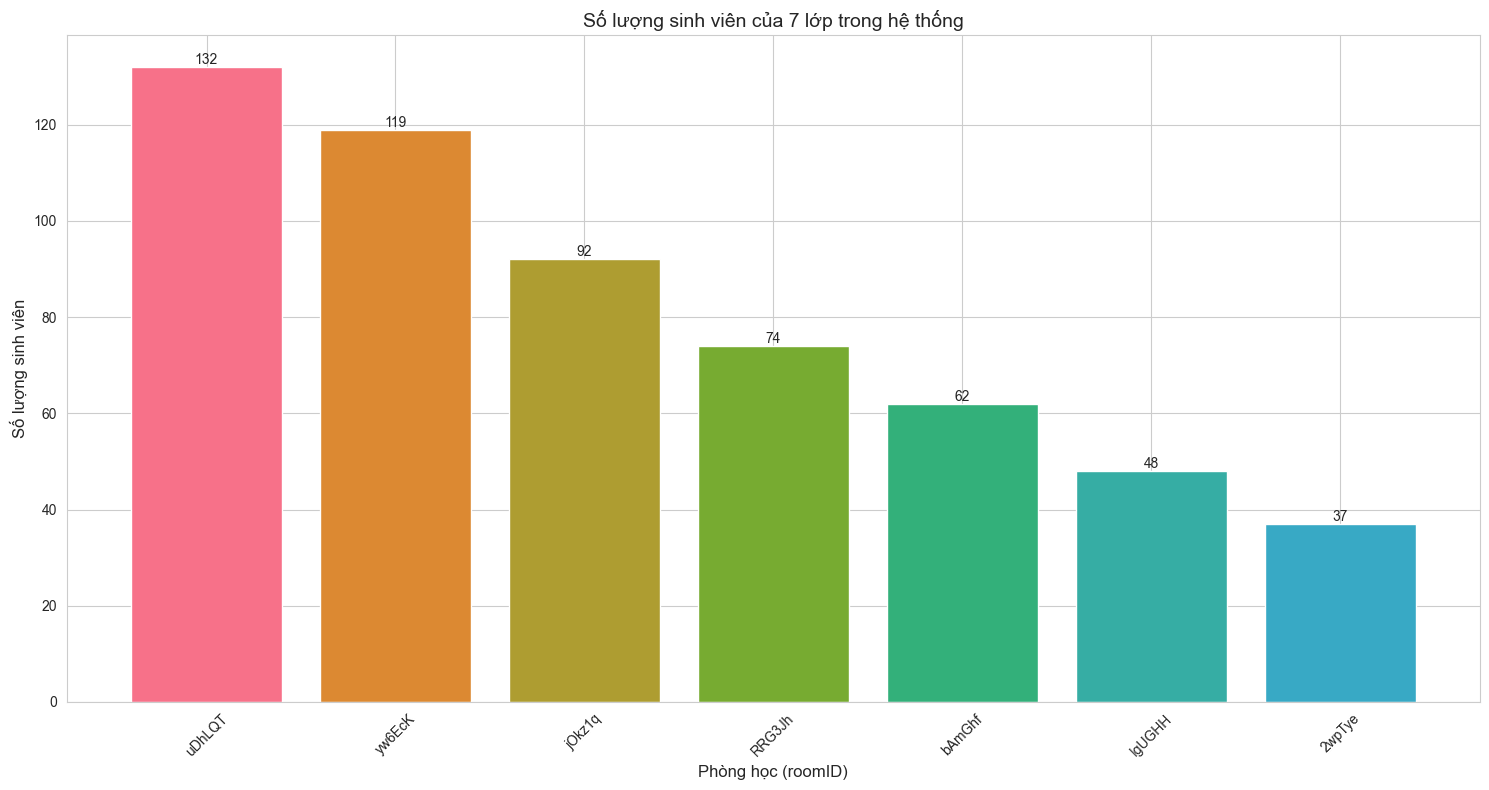


Đã xuất các file sau:
1. 8_rooms_summary.csv (Thống kê chi tiết 8 lớp)
2. student_list_room_X.csv (Danh sách sinh viên của từng lớp)
3. 8_rooms_chart.png (Biểu đồ 8 lớp)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')

# Loại bỏ roomID 'Q3kVO8'
df = df[df['roomID'] != 'Q3kVO8']

# Tính tổng số lớp
total_rooms = df['roomID'].nunique()
print(f"Tổng số lớp: {total_rooms}")

# Đếm số lượng người duy nhất dựa trên cả user và userName
room_user_counts = df.groupby('roomID').agg({
    'user': 'nunique',
    'userName': 'nunique'
}).reset_index()

# So sánh và lấy số lớn hơn giữa user và userName cho mỗi phòng
room_user_counts['Number_of_People'] = room_user_counts[['user', 'userName']].max(axis=1)
room_user_counts = room_user_counts[['roomID', 'Number_of_People']]

# Thêm thông tin chi tiết về số lượng user và userName
print("\nSo sánh số lượng user và userName trong mỗi phòng:")
comparison = df.groupby('roomID').agg({
    'user': lambda x: f"{x.nunique()} users",
    'userName': lambda x: f"{x.nunique()} userNames"
}).reset_index()
print(comparison)

# Sắp xếp theo số lượng người giảm dần và lấy 10 lớp có số lượng cao nhất
top_8_rooms = room_user_counts.sort_values(by='Number_of_People', ascending=False).head(10)

print("\n8 lớp có số lượng người trong hệ thống:")
print(top_8_rooms)

# Xuất danh sách sinh viên cho top 10 lớp
for room in top_8_rooms['roomID']:
    students = df[df['roomID'] == room][['user', 'userName']].drop_duplicates()
    students = students.sort_values(by='userName')
    students = students.reset_index(drop=True)
    students.index = students.index + 1
    filename = f'student_list_room_{room}.csv'
    students.to_csv(filename, encoding='utf-8-sig', index=True, index_label='STT')

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
bars = plt.bar(top_8_rooms['roomID'], top_8_rooms['Number_of_People'], 
               color=sns.color_palette("husl", 10))
plt.xlabel('Phòng học (roomID)', fontsize=12)
plt.ylabel('Số lượng sinh viên', fontsize=12)
plt.title(f'Số lượng sinh viên của 7 lớp trong hệ thống', 
          fontsize=14)
plt.xticks(rotation=45)

# Thêm số lượng sinh viên lên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()

# Lưu biểu đồ
plt.savefig('top_8_rooms_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Tạo file tổng hợp cho top 10 lớp
top_8_summary = top_8_rooms.copy()
top_8_summary['Tỷ lệ (%)'] = (top_8_summary['Number_of_People'] / 
                              top_8_summary['Number_of_People'].sum() * 100).round(2)
top_8_summary.columns = ['Mã lớp', 'Số lượng sinh viên', 'Tỷ lệ (%)']
top_8_summary.to_csv('8_rooms_summary.csv', encoding='utf-8-sig', index=False)

print("\nĐã xuất các file sau:")
print("1. 8_rooms_summary.csv (Thống kê chi tiết 8 lớp)")
print("2. student_list_room_X.csv (Danh sách sinh viên của từng lớp)")
print("3. 8_rooms_chart.png (Biểu đồ 8 lớp)")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV (thay 'data.csv' bằng tên file của bạn)
df = pd.read_csv('vncodelab_logs_update_12_3.csv')

# Lấy các trường quan trọng từ dữ liệu thực tế
# Giả định các cột 'roomID', 'user', 'userName' tồn tại trong file CSV
columns_of_interest = ['roomID', 'user', 'userName']

# Kiểm tra và lấy các giá trị mẫu từ dữ liệu
data = {
    'Tên trường': columns_of_interest,
    'Mô tả': [
        'Mã định danh của phòng học',
        'ID duy nhất của người dùng',
        'Tên người dùng'
    ],
    'Ví dụ': [
        ', '.join(df['roomID'].dropna().unique()[:3].astype(str)),  # Lấy 3 ví dụ từ roomID
        ', '.join(df['user'].dropna().unique()[:3].astype(str)),   # Lấy 3 ví dụ từ user
        ', '.join(df['userName'].dropna().unique()[:3].astype(str)) # Lấy 3 ví dụ từ userName
    ],
    'Ghi chú': [
        'Dùng để xác định lớp, tổng cộng 56 lớp theo thông tin bạn cung cấp',
        'Dùng để đếm số người duy nhất trong mỗi phòng',
        'Dùng để hiển thị danh sách sinh viên trong mỗi lớp'
    ]
}

# Tạo DataFrame từ dữ liệu
df_table = pd.DataFrame(data)

# In bảng ra màn hình để kiểm tra
print("Bảng các trường quan trọng từ dữ liệu CSV:")
print(df_table)

# Vẽ bảng thành ảnh
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Lưu ảnh
plt.savefig('log_fields_table_from_csv.png', dpi=300, bbox_inches='tight')
plt.close()

print("Đã lưu bảng dưới dạng ảnh 'log_fields_table_from_csv.png'")

C:\Users\SON\AppData\Local\Temp\ipykernel_11808\4109126416.py:5: DtypeWarning: Columns (1,3,4,7,10,16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vncodelab_logs_update_12_3.csv')


Bảng các trường quan trọng từ dữ liệu CSV:
  Tên trường                       Mô tả  \
0     roomID  Mã định danh của phòng học   
1       user  ID duy nhất của người dùng   
2   userName              Tên người dùng   

                                               Ví dụ  \
0                             zZoCYV, FBnD4d, uDhLQT   
1  Nguyen Duc Thuan, Nguyen Quynh. Mai, Nguyen Va...   
2      Nguyen The Quang, Rick Sanchez, Tran Duy Viet   

                                             Ghi chú  
0  Dùng để xác định lớp, tổng cộng 56 lớp theo th...  
1      Dùng để đếm số người duy nhất trong mỗi phòng  
2  Dùng để hiển thị danh sách sinh viên trong mỗi...  
Đã lưu bảng dưới dạng ảnh 'log_fields_table_from_csv.png'
